In [90]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [91]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [92]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

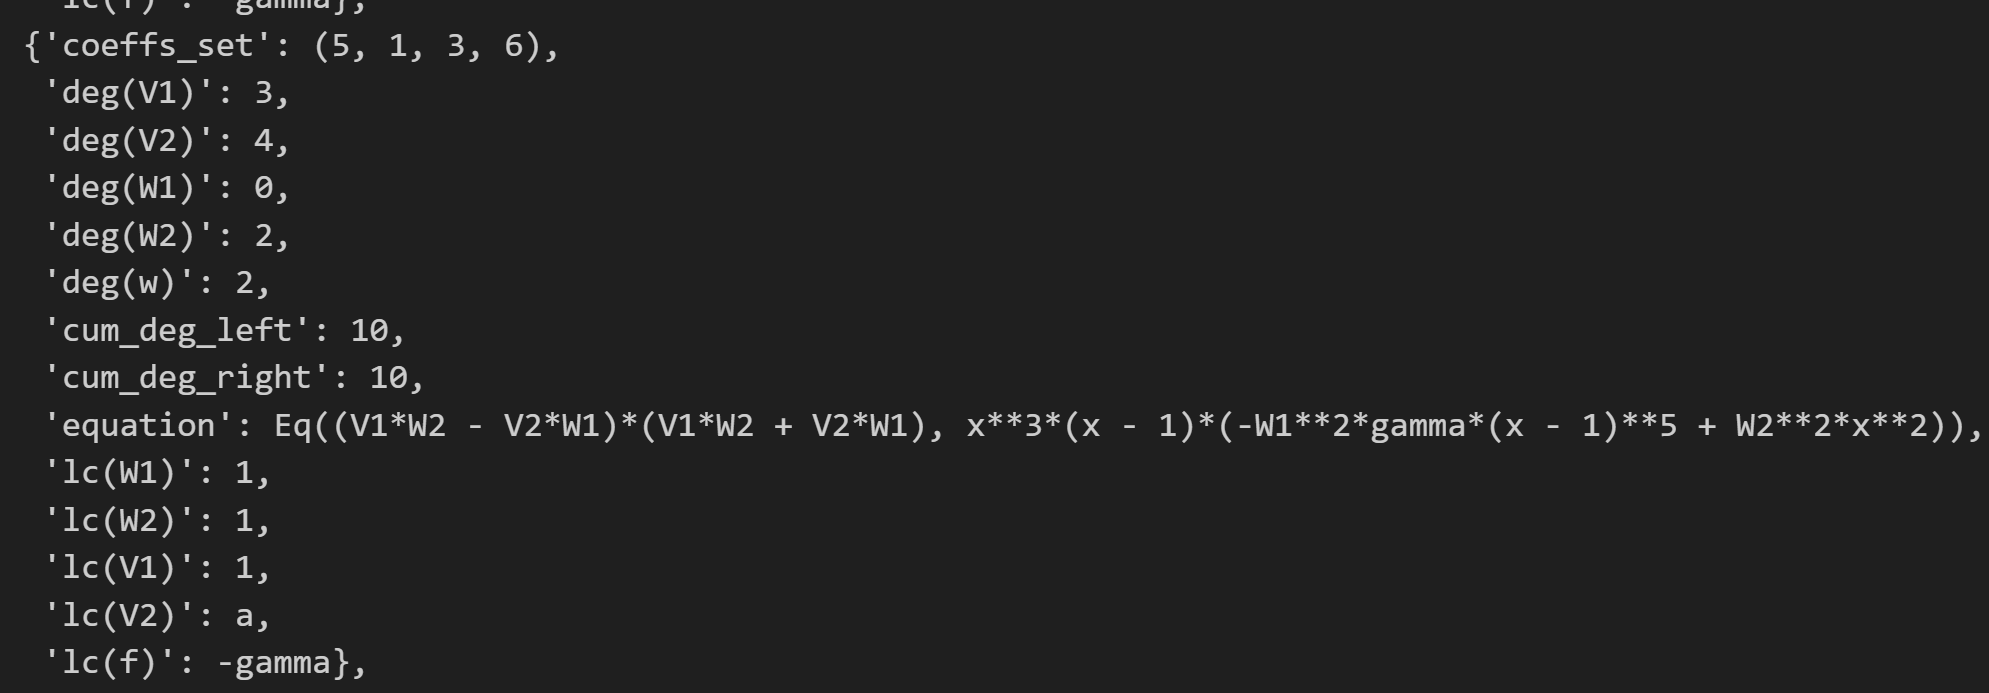

In [93]:
x, x0, x1, x2, gamma = smp.symbols('x x0 x1 x2 gamma')

In [94]:
eq_1 = smp.Poly((x - x0)**2 * x**3, x)
eq_2 = smp.Poly(((x - 1)*(x - x1)**2 * (x - x2)**2 * x**2 - gamma * (x - 1)**6), x)

In [95]:
# expr_1 = eq_1.as_expr()
# expr_2 = eq_2.as_expr()

In [96]:
p1 = smp.Poly((x-x0)**2, x)
quotient_1, remainder_1 = smp.div(eq_2, p1)
remainder_1

Poly((-6*gamma*x0**5 + 30*gamma*x0**4 - 60*gamma*x0**3 + 60*gamma*x0**2 - 30*gamma*x0 + 6*gamma + 7*x0**6 - 12*x0**5*x1 - 12*x0**5*x2 - 6*x0**5 + 5*x0**4*x1**2 + 20*x0**4*x1*x2 + 10*x0**4*x1 + 5*x0**4*x2**2 + 10*x0**4*x2 - 8*x0**3*x1**2*x2 - 4*x0**3*x1**2 - 8*x0**3*x1*x2**2 - 16*x0**3*x1*x2 - 4*x0**3*x2**2 + 3*x0**2*x1**2*x2**2 + 6*x0**2*x1**2*x2 + 6*x0**2*x1*x2**2 - 2*x0*x1**2*x2**2)*x + 5*gamma*x0**6 - 24*gamma*x0**5 + 45*gamma*x0**4 - 40*gamma*x0**3 + 15*gamma*x0**2 - gamma - 6*x0**7 + 10*x0**6*x1 + 10*x0**6*x2 + 5*x0**6 - 4*x0**5*x1**2 - 16*x0**5*x1*x2 - 8*x0**5*x1 - 4*x0**5*x2**2 - 8*x0**5*x2 + 6*x0**4*x1**2*x2 + 3*x0**4*x1**2 + 6*x0**4*x1*x2**2 + 12*x0**4*x1*x2 + 3*x0**4*x2**2 - 2*x0**3*x1**2*x2**2 - 4*x0**3*x1**2*x2 - 4*x0**3*x1*x2**2 + x0**2*x1**2*x2**2, x, domain='ZZ[x1,x2,gamma,x0]')

In [97]:
quotient_1

Poly(x**5 + (-gamma + 2*x0 - 2*x1 - 2*x2 - 1)*x**4 + (-2*gamma*x0 + 6*gamma + 3*x0**2 - 4*x0*x1 - 4*x0*x2 - 2*x0 + x1**2 + 4*x1*x2 + 2*x1 + x2**2 + 2*x2)*x**3 + (-3*gamma*x0**2 + 12*gamma*x0 - 15*gamma + 4*x0**3 - 6*x0**2*x1 - 6*x0**2*x2 - 3*x0**2 + 2*x0*x1**2 + 8*x0*x1*x2 + 4*x0*x1 + 2*x0*x2**2 + 4*x0*x2 - 2*x1**2*x2 - x1**2 - 2*x1*x2**2 - 4*x1*x2 - x2**2)*x**2 + (-4*gamma*x0**3 + 18*gamma*x0**2 - 30*gamma*x0 + 20*gamma + 5*x0**4 - 8*x0**3*x1 - 8*x0**3*x2 - 4*x0**3 + 3*x0**2*x1**2 + 12*x0**2*x1*x2 + 6*x0**2*x1 + 3*x0**2*x2**2 + 6*x0**2*x2 - 4*x0*x1**2*x2 - 2*x0*x1**2 - 4*x0*x1*x2**2 - 8*x0*x1*x2 - 2*x0*x2**2 + x1**2*x2**2 + 2*x1**2*x2 + 2*x1*x2**2)*x - 5*gamma*x0**4 + 24*gamma*x0**3 - 45*gamma*x0**2 + 40*gamma*x0 - 15*gamma + 6*x0**5 - 10*x0**4*x1 - 10*x0**4*x2 - 5*x0**4 + 4*x0**3*x1**2 + 16*x0**3*x1*x2 + 8*x0**3*x1 + 4*x0**3*x2**2 + 8*x0**3*x2 - 6*x0**2*x1**2*x2 - 3*x0**2*x1**2 - 6*x0**2*x1*x2**2 - 12*x0**2*x1*x2 - 3*x0**2*x2**2 + 2*x0*x1**2*x2**2 + 4*x0*x1**2*x2 + 4*x0*x1*x2**2 - x1

In [98]:
condition1 = smp.Eq(remainder_1.subs(x, x0), 0)
solutions = smp.solve([condition1])
solutions

[{gamma: x0**2*(x0 - x1)**2*(x0 - x2)**2/(x0 - 1)**5}, {x0: 1}]

In [99]:
gamma_sol = solutions[0][gamma]
gamma_sol

x0**2*(x0 - x1)**2*(x0 - x2)**2/(x0 - 1)**5

In [100]:
p1 = smp.Poly((x-x0)**2, x)
eq_2 = smp.Poly(eq_2.subs(gamma, gamma_sol),x)
quotient, remainder = smp.div(eq_2, p1)

In [101]:
quotient.simplify()

Poly(x**5 + (x0**6 - 11*x0**5 - x0**4*x1**2 - 4*x0**4*x1*x2 + 10*x0**4*x1 - x0**4*x2**2 + 10*x0**4*x2 + 25*x0**4 + 2*x0**3*x1**2*x2 + 2*x0**3*x1*x2**2 - 20*x0**3*x1 - 20*x0**3*x2 - 30*x0**3 - x0**2*x1**2*x2**2 + 20*x0**2*x1 + 20*x0**2*x2 + 20*x0**2 - 10*x0*x1 - 10*x0*x2 - 7*x0 + 2*x1 + 2*x2 + 1)/(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)*x**4 + (x0**7 - 11*x0**6 - x0**5*x1**2 - 4*x0**5*x1*x2 + 10*x0**5*x1 - x0**5*x2**2 + 10*x0**5*x2 + 40*x0**5 + 4*x0**4*x1**2*x2 + x0**4*x1**2 + 4*x0**4*x1*x2**2 + 4*x0**4*x1*x2 - 50*x0**4*x1 + x0**4*x2**2 - 50*x0**4*x2 - 50*x0**4 - 2*x0**3*x1**2*x2**2 - 12*x0**3*x1**2*x2 + 10*x0**3*x1**2 - 12*x0**3*x1*x2**2 + 40*x0**3*x1*x2 + 60*x0**3*x1 + 10*x0**3*x2**2 + 60*x0**3*x2 + 35*x0**3 + 6*x0**2*x1**2*x2**2 - 10*x0**2*x1**2 - 40*x0**2*x1*x2 - 40*x0**2*x1 - 10*x0**2*x2**2 - 40*x0**2*x2 - 13*x0**2 + 5*x0*x1**2 + 20*x0*x1*x2 + 14*x0*x1 + 5*x0*x2**2 + 14*x0*x2 + 2*x0 - x1**2 - 4*x1*x2 - 2*x1 - x2**2 - 2*x2)/(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1

In [102]:
remainder.simplify()

Poly((x0**6 - 6*x0**5 - x0**4*x1**2 - 4*x0**4*x1*x2 + 10*x0**4*x1 - x0**4*x2**2 + 10*x0**4*x2 + 4*x0**3*x1**2*x2 - 4*x0**3*x1**2 + 4*x0**3*x1*x2**2 - 16*x0**3*x1*x2 - 4*x0**3*x2**2 - 3*x0**2*x1**2*x2**2 + 6*x0**2*x1**2*x2 + 6*x0**2*x1*x2**2 - 2*x0*x1**2*x2**2)*x - x0**7 + 6*x0**6 + x0**5*x1**2 + 4*x0**5*x1*x2 - 10*x0**5*x1 + x0**5*x2**2 - 10*x0**5*x2 - 4*x0**4*x1**2*x2 + 4*x0**4*x1**2 - 4*x0**4*x1*x2**2 + 16*x0**4*x1*x2 + 4*x0**4*x2**2 + 3*x0**3*x1**2*x2**2 - 6*x0**3*x1**2*x2 - 6*x0**3*x1*x2**2 + 2*x0**2*x1**2*x2**2, x, domain='ZZ[x0,x1,x2]')

In [103]:
# condition2 = smp.Eq(eq_2.subs(x, x1), 0)

In [104]:
eq_1

Poly(x**5 - 2*x0*x**4 + x0**2*x**3, x, domain='ZZ[x0]')

In [105]:
eq_2

Poly(x**7 + (-x0**6 - x0**5 - x0**4*x1**2 - 4*x0**4*x1*x2 + 10*x0**4*x1 - x0**4*x2**2 + 10*x0**4*x2 + 5*x0**4 + 2*x0**3*x1**2*x2 + 2*x0**3*x1*x2**2 - 20*x0**3*x1 - 20*x0**3*x2 - 10*x0**3 - x0**2*x1**2*x2**2 + 20*x0**2*x1 + 20*x0**2*x2 + 10*x0**2 - 10*x0*x1 - 10*x0*x2 - 5*x0 + 2*x1 + 2*x2 + 1)/(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)*x**6 + (6*x0**6 + x0**5*x1**2 + 4*x0**5*x1*x2 - 10*x0**5*x1 + x0**5*x2**2 - 10*x0**5*x2 + x0**4*x1**2 + 4*x0**4*x1*x2 - 10*x0**4*x1 + x0**4*x2**2 - 10*x0**4*x2 - 12*x0**3*x1**2*x2 + 10*x0**3*x1**2 - 12*x0**3*x1*x2**2 + 40*x0**3*x1*x2 + 20*x0**3*x1 + 10*x0**3*x2**2 + 20*x0**3*x2 + 6*x0**2*x1**2*x2**2 - 10*x0**2*x1**2 - 40*x0**2*x1*x2 - 20*x0**2*x1 - 10*x0**2*x2**2 - 20*x0**2*x2 + 5*x0*x1**2 + 20*x0*x1*x2 + 10*x0*x1 + 5*x0*x2**2 + 10*x0*x2 - x1**2 - 4*x1*x2 - 2*x1 - x2**2 - 2*x2)/(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)*x**5 + (-15*x0**6 - 2*x0**5*x1**2*x2 - x0**5*x1**2 - 2*x0**5*x1*x2**2 - 4*x0**5*x1*x2 + 30*x0**5*x1 - x0**5*x2**2 + 30*x0

In [106]:
V1_m = (eq_1 + eq_2)/2
V2 = (-eq_1 + eq_2)/2

In [107]:
V1_m

x**7/2 + x**6*(-x0**6 - x0**5 - x0**4*x1**2 - 4*x0**4*x1*x2 + 10*x0**4*x1 - x0**4*x2**2 + 10*x0**4*x2 + 5*x0**4 + 2*x0**3*x1**2*x2 + 2*x0**3*x1*x2**2 - 20*x0**3*x1 - 20*x0**3*x2 - 10*x0**3 - x0**2*x1**2*x2**2 + 20*x0**2*x1 + 20*x0**2*x2 + 10*x0**2 - 10*x0*x1 - 10*x0*x2 - 5*x0 + 2*x1 + 2*x2 + 1)/(2*(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)) + x**5*(6*x0**6 + x0**5*x1**2 + 4*x0**5*x1*x2 - 10*x0**5*x1 + x0**5*x2**2 - 10*x0**5*x2 + x0**5 + x0**4*x1**2 + 4*x0**4*x1*x2 - 10*x0**4*x1 + x0**4*x2**2 - 10*x0**4*x2 - 5*x0**4 - 12*x0**3*x1**2*x2 + 10*x0**3*x1**2 - 12*x0**3*x1*x2**2 + 40*x0**3*x1*x2 + 20*x0**3*x1 + 10*x0**3*x2**2 + 20*x0**3*x2 + 10*x0**3 + 6*x0**2*x1**2*x2**2 - 10*x0**2*x1**2 - 40*x0**2*x1*x2 - 20*x0**2*x1 - 10*x0**2*x2**2 - 20*x0**2*x2 - 10*x0**2 + 5*x0*x1**2 + 20*x0*x1*x2 + 10*x0*x1 + 5*x0*x2**2 + 10*x0*x2 + 5*x0 - x1**2 - 4*x1*x2 - 2*x1 - x2**2 - 2*x2 - 1)/(2*(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)) + x**4*(-17*x0**6 - 2*x0**5*x1**2*x2 - x0**5*x1**2 - 2*x0**5

In [108]:
V2

x**7/2 + x**6*(-x0**6 - x0**5 - x0**4*x1**2 - 4*x0**4*x1*x2 + 10*x0**4*x1 - x0**4*x2**2 + 10*x0**4*x2 + 5*x0**4 + 2*x0**3*x1**2*x2 + 2*x0**3*x1*x2**2 - 20*x0**3*x1 - 20*x0**3*x2 - 10*x0**3 - x0**2*x1**2*x2**2 + 20*x0**2*x1 + 20*x0**2*x2 + 10*x0**2 - 10*x0*x1 - 10*x0*x2 - 5*x0 + 2*x1 + 2*x2 + 1)/(2*(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)) + x**5*(6*x0**6 + x0**5*x1**2 + 4*x0**5*x1*x2 - 10*x0**5*x1 + x0**5*x2**2 - 10*x0**5*x2 - x0**5 + x0**4*x1**2 + 4*x0**4*x1*x2 - 10*x0**4*x1 + x0**4*x2**2 - 10*x0**4*x2 + 5*x0**4 - 12*x0**3*x1**2*x2 + 10*x0**3*x1**2 - 12*x0**3*x1*x2**2 + 40*x0**3*x1*x2 + 20*x0**3*x1 + 10*x0**3*x2**2 + 20*x0**3*x2 - 10*x0**3 + 6*x0**2*x1**2*x2**2 - 10*x0**2*x1**2 - 40*x0**2*x1*x2 - 20*x0**2*x1 - 10*x0**2*x2**2 - 20*x0**2*x2 + 10*x0**2 + 5*x0*x1**2 + 20*x0*x1*x2 + 10*x0*x1 + 5*x0*x2**2 + 10*x0*x2 - 5*x0 - x1**2 - 4*x1*x2 - 2*x1 - x2**2 - 2*x2 + 1)/(2*(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1)) + x**4*(-13*x0**6 - 2*x0**5*x1**2*x2 - x0**5*x1**2 - 2*x0**5

In [109]:
solution_x1 = smp.solve(V1_m.subs(x, x0),x1)
solution = solution_x1[0]

IndexError: list index out of range

In [20]:
print(solution)

x0


In [21]:
V_q = (V1_m * V1_m)

In [22]:
V_q

(x**7/2 + x**6*(-x1**6 - x1**5 - x1**4*x2**2 - 4*x1**4*x2*x3 + 10*x1**4*x2 - x1**4*x3**2 + 10*x1**4*x3 + 5*x1**4 + 2*x1**3*x2**2*x3 + 2*x1**3*x2*x3**2 - 20*x1**3*x2 - 20*x1**3*x3 - 10*x1**3 - x1**2*x2**2*x3**2 + 20*x1**2*x2 + 20*x1**2*x3 + 10*x1**2 - 10*x1*x2 - 10*x1*x3 - 5*x1 + 2*x2 + 2*x3 + 1)/(2*(x1**5 - 5*x1**4 + 10*x1**3 - 10*x1**2 + 5*x1 - 1)) + x**5*(6*x1**6 + x1**5*x2**2 + 4*x1**5*x2*x3 - 10*x1**5*x2 + x1**5*x3**2 - 10*x1**5*x3 + x1**5 + x1**4*x2**2 + 4*x1**4*x2*x3 - 10*x1**4*x2 + x1**4*x3**2 - 10*x1**4*x3 - 5*x1**4 - 12*x1**3*x2**2*x3 + 10*x1**3*x2**2 - 12*x1**3*x2*x3**2 + 40*x1**3*x2*x3 + 20*x1**3*x2 + 10*x1**3*x3**2 + 20*x1**3*x3 + 10*x1**3 + 6*x1**2*x2**2*x3**2 - 10*x1**2*x2**2 - 40*x1**2*x2*x3 - 20*x1**2*x2 - 10*x1**2*x3**2 - 20*x1**2*x3 - 10*x1**2 + 5*x1*x2**2 + 20*x1*x2*x3 + 10*x1*x2 + 5*x1*x3**2 + 10*x1*x3 + 5*x1 - x2**2 - 4*x2*x3 - 2*x2 - x3**2 - 2*x3 - 1)/(2*(x1**5 - 5*x1**4 + 10*x1**3 - 10*x1**2 + 5*x1 - 1)) + x**4*(-x0*x1**5 + 5*x0*x1**4 - 10*x0*x1**3 + 10*x0*x1**2 

In [ ]:
V_q = V_q.simplify().subs(x1, solution).simplify()

KeyboardInterrupt: 

In [ ]:
V_q

(x**7*(x0**5 - 5*x0**4 + 10*x0**3 - 10*x0**2 + 5*x0 - 1) - x**6*(x0**6 + x0**5 + x0**4*x2**2 + 4*x0**4*x2*x3 - 10*x0**4*x2 + x0**4*x3**2 - 10*x0**4*x3 - 5*x0**4 - 2*x0**3*x2**2*x3 - 2*x0**3*x2*x3**2 + 20*x0**3*x2 + 20*x0**3*x3 + 10*x0**3 + x0**2*x2**2*x3**2 - 20*x0**2*x2 - 20*x0**2*x3 - 10*x0**2 + 10*x0*x2 + 10*x0*x3 + 5*x0 - 2*x2 - 2*x3 - 1) + x**5*(6*x0**6 + x0**5*x2**2 + 4*x0**5*x2*x3 - 10*x0**5*x2 + x0**5*x3**2 - 10*x0**5*x3 + x0**5 + x0**4*x2**2 + 4*x0**4*x2*x3 - 10*x0**4*x2 + x0**4*x3**2 - 10*x0**4*x3 - 5*x0**4 - 12*x0**3*x2**2*x3 + 10*x0**3*x2**2 - 12*x0**3*x2*x3**2 + 40*x0**3*x2*x3 + 20*x0**3*x2 + 10*x0**3*x3**2 + 20*x0**3*x3 + 10*x0**3 + 6*x0**2*x2**2*x3**2 - 10*x0**2*x2**2 - 40*x0**2*x2*x3 - 20*x0**2*x2 - 10*x0**2*x3**2 - 20*x0**2*x3 - 10*x0**2 + 5*x0*x2**2 + 20*x0*x2*x3 + 10*x0*x2 + 5*x0*x3**2 + 10*x0*x3 + 5*x0 - x2**2 - 4*x2*x3 - 2*x2 - x3**2 - 2*x3 - 1) - x**4*(17*x0**6 + 2*x0**5*x2**2*x3 + x0**5*x2**2 + 2*x0**5*x2*x3**2 + 4*x0**5*x2*x3 - 30*x0**5*x2 + x0**5*x3**2 - 30*x0*

In [71]:
p1 = smp.Poly((x-x0)**2,x)

quotient, remainder = smp.div(V_q, p1)

In [72]:
V1 = quotient

In [73]:
V1.simplify()

KeyboardInterrupt: 

In [124]:
remainder

Poly(0, x0, x, domain='QQ')

In [125]:
f = smp.Poly(V1 - x**5 * (x - 1), x)

In [126]:
f

Poly(1/4*x**12 + (-3*x0/2 - 1/2)*x**11 + (15*x0**2/4 + 3*x0 + 3/4)*x**10 + (-5*x0**3 - 15*x0**2/2 - 7*x0/2 - 1/2)*x**9 + (15*x0**4/4 + 10*x0**3 + 27*x0**2/4 + 2*x0 + 1/4)*x**8 + (-3*x0**5/2 - 15*x0**4/2 - 7*x0**3 - 3*x0**2 - x0/2)*x**7 + (x0**6/4 + 3*x0**5 + 17*x0**4/4 + 2*x0**3 + x0**2/4 - 1)*x**6 + (-x0**6/2 - 3*x0**5/2 - x0**4/2 + 1)*x**5 + x0**6/4*x**4, x, domain='QQ[x0]')

In [127]:
coeffs = f.all_coeffs()

In [128]:
print(coeffs[1])

-3*x0/2 - 1/2


In [129]:
eq1 = smp.Eq(coeffs[0], 0)
eq2 = smp.Eq(coeffs[1], -gamma)

# Solve the system of equations for w
solution_gamma = smp.solve([eq1, eq2], gamma)
gamma_solution = solution_gamma[0][0]
gamma_solution

IndexError: list index out of range

In [27]:
f = f.subs(gamma, gamma_solution).simplify()

In [28]:
print(f)

(-4*x**5*x0**7 + 12*x**5*x0**6 - 12*x**5*x0**5 + 4*x**5*x0**4 + x**4*x0**8 + 6*x**4*x0**7 - 17*x**4*x0**6 + 20*x**4*x0**5 - 19*x**4*x0**4 + 16*x**4*x0**3 - 5*x**4*x0**2 - 2*x**4*x0 + x**4 - 2*x**3*x0**8 - 2*x**3*x0**7 - 2*x**3*x0**6 + 4*x**3*x0**5 + 4*x**3*x0**4 - 14*x**3*x0**3 + 10*x**3*x0**2 - 2*x**3*x0 + x**2*x0**8 + 2*x**2*x0**7 + 6*x**2*x0**6 - 8*x**2*x0**5 + 10*x**2*x0**4 - 6*x**2*x0**3 + x**2*x0**2 - 2*x*x0**7 - 4*x*x0**5 + 2*x*x0**4 + x0**6)/(4*(x0**6 - 6*x0**5 + 15*x0**4 - 20*x0**3 + 15*x0**2 - 6*x0 + 1))


In [29]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [30]:
f_main = factor_coeffs(f, x)
f

(-4*x**5*x0**7 + 12*x**5*x0**6 - 12*x**5*x0**5 + 4*x**5*x0**4 + x**4*x0**8 + 6*x**4*x0**7 - 17*x**4*x0**6 + 20*x**4*x0**5 - 19*x**4*x0**4 + 16*x**4*x0**3 - 5*x**4*x0**2 - 2*x**4*x0 + x**4 - 2*x**3*x0**8 - 2*x**3*x0**7 - 2*x**3*x0**6 + 4*x**3*x0**5 + 4*x**3*x0**4 - 14*x**3*x0**3 + 10*x**3*x0**2 - 2*x**3*x0 + x**2*x0**8 + 2*x**2*x0**7 + 6*x**2*x0**6 - 8*x**2*x0**5 + 10*x**2*x0**4 - 6*x**2*x0**3 + x**2*x0**2 - 2*x*x0**7 - 4*x*x0**5 + 2*x*x0**4 + x0**6)/(4*(x0**6 - 6*x0**5 + 15*x0**4 - 20*x0**3 + 15*x0**2 - 6*x0 + 1))

In [31]:
f_main.as_expr()

-x**5*x0**4/(x0 - 1)**3 + x**4*(x0**8 + 6*x0**7 - 17*x0**6 + 20*x0**5 - 19*x0**4 + 16*x0**3 - 5*x0**2 - 2*x0 + 1)/(4*(x0 - 1)**6) - x**3*x0*(x0**2 + x0 - 1)*(x0**5 + 2*x0**3 - 4*x0**2 + 4*x0 - 1)/(2*(x0 - 1)**6) + x**2*x0**2*(x0**6 + 2*x0**5 + 6*x0**4 - 8*x0**3 + 10*x0**2 - 6*x0 + 1)/(4*(x0 - 1)**6) - x*x0**4*(x0**3 + 2*x0 - 1)/(2*(x0 - 1)**6) + x0**6/(4*(x0 - 1)**6)

In [32]:
calc = MagmaCalculator()

In [33]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [34]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [35]:
def curve_search(rang):
    for value in range(rang[0],rang[1]):
        f = f_main.subs(x0,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [37]:
curve_search([10,20])

In [239]:
print(smp.latex(f.as_expr()))

- \frac{x^{5} x_{0}^{4}}{\left(x_{0} - 1\right)^{3}} + \frac{x^{4} \left(x_{0}^{8} + 6 x_{0}^{7} - 17 x_{0}^{6} + 20 x_{0}^{5} - 19 x_{0}^{4} + 16 x_{0}^{3} - 5 x_{0}^{2} - 2 x_{0} + 1\right)}{4 \left(x_{0} - 1\right)^{6}} - \frac{x^{3} x_{0} \left(x_{0}^{2} + x_{0} - 1\right) \left(x_{0}^{5} + 2 x_{0}^{3} - 4 x_{0}^{2} + 4 x_{0} - 1\right)}{2 \left(x_{0} - 1\right)^{6}} + \frac{x^{2} x_{0}^{2} \left(x_{0}^{6} + 2 x_{0}^{5} + 6 x_{0}^{4} - 8 x_{0}^{3} + 10 x_{0}^{2} - 6 x_{0} + 1\right)}{4 \left(x_{0} - 1\right)^{6}} - \frac{x x_{0}^{4} \left(x_{0}^{3} + 2 x_{0} - 1\right)}{2 \left(x_{0} - 1\right)^{6}} + \frac{x_{0}^{6}}{4 \left(x_{0} - 1\right)^{6}}
